### Loan Approval Prediction with SVC, Logistic Regression, Naive Bayes, and KNN

In [180]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [181]:
# Import the data
df = pd.read_csv('Loan data.csv')

In [182]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


EDA and Data Cleaning

In [183]:
# Checking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [184]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [185]:
df.shape

(614, 13)

In [186]:
# Check for missing data
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling Missing Data

In [187]:
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace= True)
df['Gender'].isna().sum()

0

In [188]:
mode_married = df['Married'].mode()[0]
df['Married'].fillna(mode_married, inplace= True)
df['Married'].isna().sum()

0

In [189]:
mode_self_employed = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(mode_self_employed, inplace= True)
df['Self_Employed'].isna().sum()

0

In [190]:
mean_loan_amount = df['LoanAmount'].mean()
df['LoanAmount'].fillna(round(mean_loan_amount),inplace= True)
df['LoanAmount'].isna().sum()

0

In [191]:
mean_loan_amount_term = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(round(mean_loan_amount_term),inplace= True)
df['Loan_Amount_Term'].isna().sum()

0

In [192]:
mean_credit_history = df['Credit_History'].mean()
df['Credit_History'].fillna(round(mean_credit_history),inplace= True)
df['Credit_History'].isna().sum()

0

In [193]:
# Replacing the 3+ in the dependents column to 4
df = df.replace(to_replace= '3+', value =4)

In [194]:
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [195]:
df['Dependents'].astype(float)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    4.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64

In [196]:
median_dependents = df['Dependents'].median()
df['Dependents'].fillna(round(median_dependents),inplace= True)
df['Dependents'].isna().sum()

0

In [197]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Visualizing the Data

<AxesSubplot:xlabel='Education', ylabel='count'>

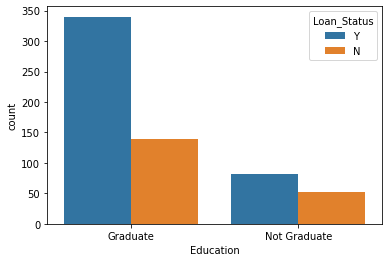

In [198]:
sns.countplot(x= 'Education', hue='Loan_Status', data = df)

Graduates have a higher chance of loan approval

<AxesSubplot:xlabel='Married', ylabel='count'>

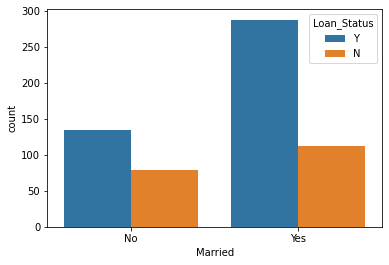

In [199]:
sns.countplot(x= 'Married', hue='Loan_Status', data = df)

Married people also have a higher chance of loan approval

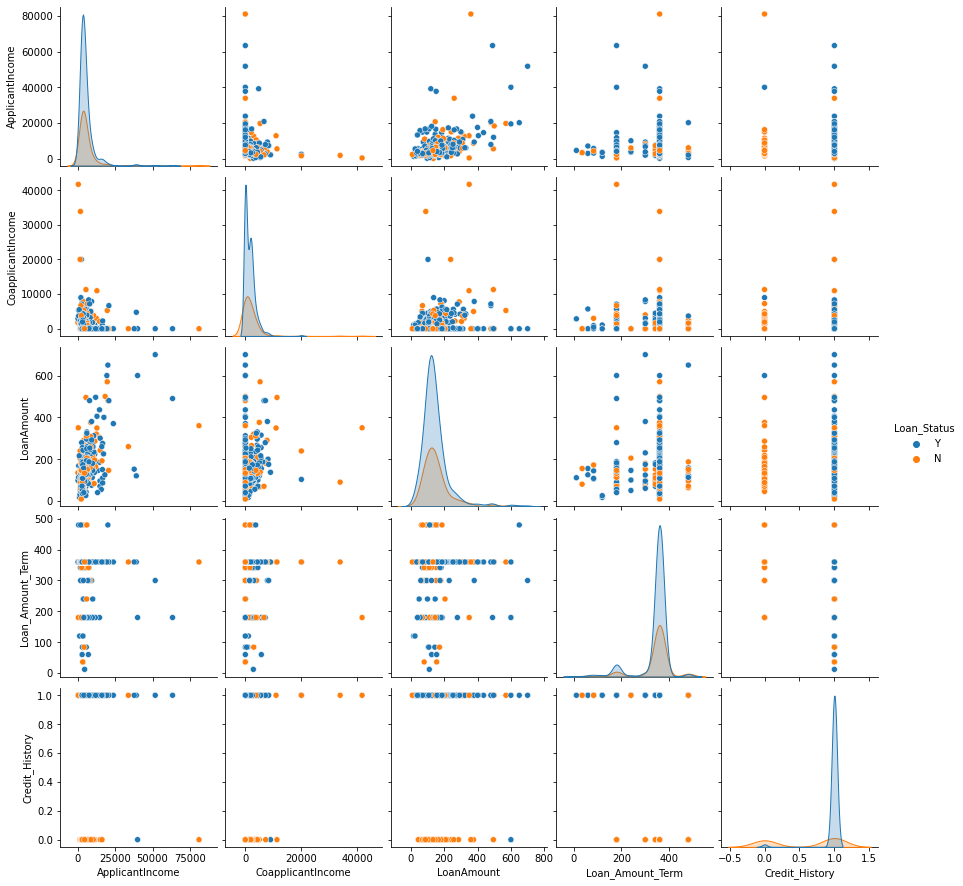

In [200]:
# Pairplot visualization of the variables
sns.pairplot(data=df, hue= 'Loan_Status')

In [201]:
# Checking data correlation
round(df.corr(),2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.02
CoapplicantIncome,-0.12,1.00,0.19,-0.06,0.01
LoanAmount,0.57,0.19,1.00,0.04,-0.00
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,0.00
Credit_History,-0.02,0.01,-0.00,0.00,1.00


There seems to be no strong correlation between the variables

Converting categorical data to numeric data

In [202]:
df.replace({'Loan_Status':{'Y':1, 'N':0}}, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [203]:
# Using One Hot Encoder
enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False).set_output(transform='pandas')

In [204]:
enc_transform = enc.fit_transform(df[['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']])
enc_transform.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [205]:
# Concatenating the columns to the dataframe
df = pd.concat([df, enc_transform], axis= 1).drop(columns= ['Gender', 'Married', 'Education',
                                                            'Self_Employed','Property_Area'])
df.head(1)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,146.0,360.0,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [206]:
# Merging similar columns into one for better readability 

df['Married'] = df.apply(lambda row: '1' if row['Married_Yes']== 1.0 else '0' if row['Married_No']== 1.0 
                        else 'unknown', axis =1)

df['Gender'] = df.apply(lambda row: '0' if row['Gender_Female']== 1.0 else '1' if row['Gender_Male']== 1.0 
                        else 'unknown', axis =1)

df['Education'] = df.apply(lambda row: '1' if row['Education_Graduate']== 1.0 else '0' if row['Education_Not Graduate']== 1.0 
                        else 'unknown', axis =1)

df['Self_Employed'] = df.apply(lambda row: '1' if row['Self_Employed_Yes']== 1.0 else '0' if row['Self_Employed_No']== 1.0 
                        else 'unknown', axis =1)


df['Property_Area'] = df.apply(lambda row: '0' if row['Property_Area_Rural']== 1.0 else '1' if row['Property_Area_Semiurban']
                               == 1.0 else '2' if row['Property_Area_Urban'] == 1.0 else 'unknown', axis =1)


df.drop(columns= ['Married_Yes', 'Married_No','Gender_Female','Gender_Male',
                 'Education_Graduate','Education_Not Graduate','Self_Employed_Yes',
                 'Self_Employed_No','Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban'], inplace=True)

df.head(1)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married,Gender,Education,Self_Employed,Property_Area
0,LP001002,0,5849,0.0,146.0,360.0,1.0,1,0,1,1,0,2


Splitting into X and y variables

In [207]:
X=df.drop(columns = ['Loan_ID', 'Loan_Status'])
y= df['Loan_Status']

In [208]:
# Train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state= 42)

Training with SVC

In [209]:
clf = svm.SVC(kernel ='linear')

In [210]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [211]:
test_pred= clf.predict(X_test)

In [212]:
# SVC Evaluation
test_accuracy = accuracy_score(test_pred, y_test)
test_precision = precision_score(test_pred, y_test)
test_recall_score = recall_score(test_pred, y_test)
test_f1_score =  f1_score(test_pred, y_test)


print('Accuracy of the model on train data',test_accuracy)
print('Precision of the model on train data',test_precision)
print('Recall of the model on train data',test_recall_score)
print('F1_score of the model on train data',test_f1_score)

Accuracy of the model on train data 0.8536585365853658
Precision of the model on train data 0.9882352941176471
Recall of the model on train data 0.8316831683168316
F1_score of the model on train data 0.903225806451613


Using Logistic Regression

In [213]:
model = LogisticRegression()

In [214]:
model.fit(X_train, y_train)

LogisticRegression()

In [215]:
logistic_predictions = model.predict(X_test)

In [216]:
# Logistic Regression Model Evaluation
logistic_accuracy = accuracy_score(logistic_predictions, y_test)
logistic_precision = precision_score(logistic_predictions, y_test)
logistic_recall_score = recall_score(logistic_predictions, y_test)
logistic_f1_score =  f1_score(logistic_predictions, y_test)

print('Accuracy of the model on train data',logistic_accuracy)
print('Precision of the model on train data',logistic_precision)
print('Recall of the model on train data',logistic_recall_score)
print('F1_score of the model on train data',logistic_f1_score)


Accuracy of the model on train data 0.8617886178861789
Precision of the model on train data 0.9882352941176471
Recall of the model on train data 0.84
F1_score of the model on train data 0.9081081081081082


Using Naive Bayes

In [217]:
gnb= GaussianNB()

In [218]:
gnb.fit(X_train,y_train)

GaussianNB()

In [219]:
gnb_predictions = gnb.predict(X_test)

In [227]:
# Naive Bayes Model Evaluation
gnb_accuracy = accuracy_score(gnb_predictions, y_test)
gnb_precision = precision_score(gnb_predictions, y_test)
gnb_recall_score = recall_score(gnb_predictions, y_test)
gnb_f1_score =  f1_score(gnb_predictions, y_test)

print('Accuracy of the model on train data',gnb_accuracy)
print('Precision of the model on train data',gnb_precision)
print('Recall of the model on train data',gnb_recall_score)
print('F1_score of the model on train data',gnb_f1_score)


Accuracy of the model on train data 0.8455284552845529
Precision of the model on train data 0.9647058823529412
Recall of the model on train data 0.8367346938775511
F1_score of the model on train data 0.8961748633879782


Using KNN

In [221]:
neigh = KNeighborsClassifier(n_neighbors = 5)

In [222]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [223]:
neigh_predictions = neigh.predict(X_test)

In [226]:
# KNN Model Evaluation
neigh_accuracy = accuracy_score(neigh_predictions, y_test)
neigh_precision = precision_score(neigh_predictions, y_test)
neigh_recall_score = recall_score(neigh_predictions, y_test)
neigh_f1_score =  f1_score(neigh_predictions, y_test)

print('Accuracy of the model on train data',neigh_accuracy)
print('Precision of the model on train data',neigh_precision)
print('Recall of the model on train data',neigh_recall_score)
print('F1_score of the model on train data',neigh_f1_score)


Accuracy of the model on train data 0.6504065040650406
Precision of the model on train data 0.8117647058823529
Recall of the model on train data 0.71875
F1_score of the model on train data 0.7624309392265194


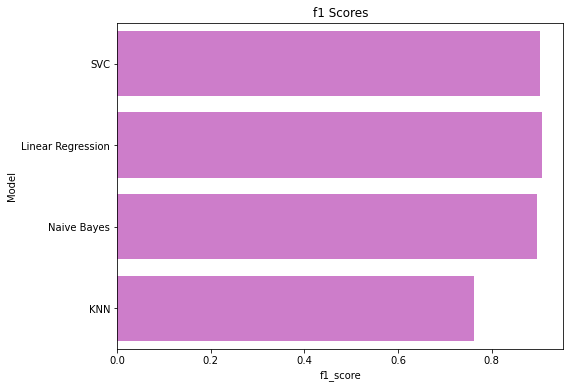

In [225]:
# Visualizing the f1 scores of the models
f1_visualization = pd.DataFrame({'Model': ['SVC', 'Linear Regression', 'Naive Bayes', 'KNN'],
                                'f1_score':[ 0.903225806451613,0.9081081081081082,0.8961748633879782,0.7624309392265194]})

plt.figure(figsize=(8,6))
plt.title('f1 Scores')
sns.barplot(x= 'f1_score', y= 'Model', data = f1_visualization, color = '#DA70D6')
plt.show()

Linear Regression seems to perform better than the rest when generalizing